<a href="https://colab.research.google.com/github/yasin-peker/Walmart-Predictive-ML/blob/main/Walmart_Prediction_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

In [2]:
# Load the input train and test datasets
train_ds = pd.read_csv("bigmart_train.csv")
test_ds = pd.read_csv("bigmart_test.csv")  

In [3]:
# Inspect the size of the train dataset
print(f"Train Dataset-(Row, Column): {train_ds.shape}")

Train Dataset-(Row, Column): (8523, 12)


In [4]:
# Inspect the size of the test dataset
print(f"Test Dataset-(Row, Column): {test_ds.shape}")

Test Dataset-(Row, Column): (5681, 11)


In [5]:
# Check the column names of the train dataset
train_ds.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
# Check the column names of the test dataset
test_ds.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
# To perform EDA operations, combine train and test datasets
train_ds["Source"] = "train"   # Shows the source of the data
test_ds["Source"] = "test"
train_test_dataset = pd.concat([train_ds, test_ds], ignore_index = True)
print(train_test_dataset.shape)

(14204, 13)


In [8]:
# Inspect the top five rows the concatenated dataset
train_test_dataset.head()
# Target variable is Item_Outlet_Sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [9]:
# Describe the dataset
train_test_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
# Check empty or missing data
train_test_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

The missing values in the dataset:


*   Item_Weight: 2439
*   Outlet_Size: 4016
*   Item_Outlet_Sales: 5681



In [11]:
# Print the unique values in the Item_Fat_Content column. Normally, there are two types of Item_Fat_Content: Low fat or Regular
train_test_dataset["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
# Print the unique values in the Outlet_Establishment_Year column. The year range is between 1985 and 2009
train_test_dataset["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [13]:
# Calculate the age of the outlet: Outlet_Age
train_test_dataset["Outlet_Age"] = 2023 - train_test_dataset["Outlet_Establishment_Year"]

In [14]:
# Check the result
train_test_dataset.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24


In [15]:
# Print the unique values in the Outlet_Size
train_test_dataset["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

There are missing values in the Outlet_Size column

In [16]:
# Print the count value of the Item_Fat_Content column
train_test_dataset["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [17]:
# Print the count value of the Outlet_Size column
train_test_dataset["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [18]:
# Print the most common element in the Outlet_Size
train_test_dataset["Outlet_Size"].mode()[0]

'Medium'

In [19]:
# Two variables with missing values: Item_Weight and Outlet_Size
# Replace missing values with modes of the corresponding items
train_test_dataset["Outlet_Size"] = train_test_dataset["Outlet_Size"].fillna(train_test_dataset["Outlet_Size"].mode()[0])

In [20]:
train_test_dataset["Item_Weight"] = train_test_dataset["Item_Weight"].fillna(train_test_dataset["Item_Weight"].mean())

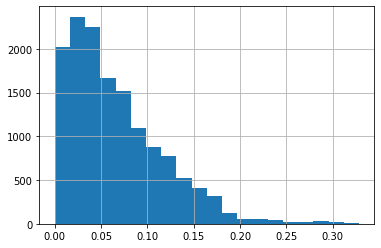

In [21]:
# Plot an histogram to show distribution of the Item_Visibility
train_test_dataset["Item_Visibility"].hist(bins=20)

In [22]:
# Detect outliers
# Calculate the first quartile
Q1 = train_test_dataset["Item_Visibility"].quantile(0.25)
# Calculate the second quartile
Q3 = train_test_dataset["Item_Visibility"].quantile(0.75)

In [23]:
# Calculate the interquartile range(IQR)
IQR = Q3 - Q1

In [24]:
# Remove the outliers and store the result to a new dataset
cleaned_data = train_test_dataset.query("(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)")

In [25]:
# Display the cleaned data
cleaned_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14


In [26]:
# Check the size of the cleaned data
cleaned_data.shape

(13943, 14)

In [27]:
# Check the previous dataset
train_test_dataset.shape

(14204, 14)

In [28]:
# Assign the cleaned data to the previous dataframe
train_test_dataset = cleaned_data

In [29]:
train_test_dataset.shape

(13943, 14)

In [30]:
# Convert categorical values into numerical value in the Item_Visibility column
train_test_dataset["Item_Visibility_bins"] = pd.cut(train_test_dataset["Item_Visibility"], [0.000, 0.065, 0.13, 0.2], labels = ["Low Viz", "Med Viz", "High Viz"])

<ipython-input-30-f93f13b46747>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test_dataset["Item_Visibility_bins"] = pd.cut(train_test_dataset["Item_Visibility"], [0.000, 0.065, 0.13, 0.2], labels = ["Low Viz", "Med Viz", "High Viz"])


In [31]:
# Print the count the Item_Visibility
train_test_dataset["Item_Visibility_bins"].value_counts()

Low Viz     7363
Med Viz     4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [32]:
# Replace the Null values with Low Visibility
train_test_dataset["Item_Visibility_bins"] = train_test_dataset["Item_Visibility_bins"].replace(np.nan, "Low Viz", regex = True)

<ipython-input-32-aa90951be625>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test_dataset["Item_Visibility_bins"] = train_test_dataset["Item_Visibility_bins"].replace(np.nan, "Low Viz", regex = True)


In [33]:
train_test_dataset["Item_Fat_Content"] = train_test_dataset["Item_Fat_Content"].replace(["low fat", "LF"], "Low Fat")

<ipython-input-33-6786ed0fb5a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test_dataset["Item_Fat_Content"] = train_test_dataset["Item_Fat_Content"].replace(["low fat", "LF"], "Low Fat")


In [34]:
train_test_dataset["Item_Fat_Content"] = train_test_dataset["Item_Fat_Content"].replace("reg", "Regular")

<ipython-input-34-bb9e16f69070>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test_dataset["Item_Fat_Content"] = train_test_dataset["Item_Fat_Content"].replace("reg", "Regular")


In [35]:
train_test_dataset["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [36]:
# Initiliaze the label encoder
label_encoder = LabelEncoder()

In [37]:
# Transform the Item_Fat_Content 
train_test_dataset["Item_Fat_Content"] = label_encoder.fit_transform(train_test_dataset["Item_Fat_Content"])

<ipython-input-37-8f6b56648776>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test_dataset["Item_Fat_Content"] = label_encoder.fit_transform(train_test_dataset["Item_Fat_Content"])


In [38]:
# Transform the Item_Visibility_bins
train_test_dataset["Item_Visibility_bins"] = label_encoder.fit_transform(train_test_dataset["Item_Visibility_bins"])

<ipython-input-38-434b19a7fea1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test_dataset["Item_Visibility_bins"] = label_encoder.fit_transform(train_test_dataset["Item_Visibility_bins"])


In [39]:
# Transform the Outlet_Size
train_test_dataset["Outlet_Size"] = label_encoder.fit_transform(train_test_dataset["Outlet_Size"])

In [40]:
# Transform the Outlet_Location_Type
train_test_dataset["Outlet_Location_Type"] = label_encoder.fit_transform(train_test_dataset["Outlet_Location_Type"])

In [41]:
# Print the unique values of the Outlet_Type
train_test_dataset["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [42]:
# Create dummies for Outlet_Type
dummy = pd.get_dummies(train_test_dataset["Outlet_Type"])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [43]:
# Inspect the Item_Identifier
train_test_dataset["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [44]:
train_test_dataset["Item_Identifier"].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [45]:
# Reduce the number of Items by mapping
train_test_dataset["Item_Type_Combined"] = train_test_dataset["Item_Identifier"].apply(lambda x: x[0:2])
train_test_dataset["Item_Type_Combined"] = train_test_dataset["Item_Type_Combined"].map({"FD": "Food",
                                                                                         "NC": "Non-Consumable",
                                                                                         "DR": "Drinks"})

In [46]:
train_test_dataset["Item_Type_Combined"].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [47]:
train_test_dataset.shape

(13943, 16)

In [48]:
# One-hot encoding for transforming categorical values into numerical values
train_test_dataset = pd.get_dummies(train_test_dataset, columns=["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Size",
                                                                 "Outlet_Type", "Item_Type_Combined"])

In [49]:
train_test_dataset.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
Source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

In [50]:
warnings.filterwarnings("ignore")

# Drop the columns that are converted into different data type
train_test_dataset.drop(["Item_Type", "Outlet_Establishment_Year"], axis=1, inplace=True)

# Divide the dataset into train and test datasets
train_ds = train_test_dataset.loc[train_test_dataset["Source"] == "train"]
test_ds = train_test_dataset.loc[train_test_dataset["Source"] == "test"]

# Drop unused columns
train_ds.drop(["Source"], axis=1, inplace=True)
test_ds.drop(["Item_Outlet_Sales", "Source"], axis=1, inplace=True)

# Export modified train and test datasets
train_ds.to_csv("train_ds_modified.csv", index=False)
test_ds.to_csv("test_ds_modified.csv", index=False)

In [51]:
# Read the new train and test datasets
train_new = pd.read_csv("train_ds_modified.csv")
test_new = pd.read_csv("test_ds_modified.csv")

In [52]:
train_new.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_

In [53]:
# Drop the irrelevant items from train_new dataset
# Create independent variable X_train and dependent variable y_train
X_train = train_new.drop(["Item_Outlet_Sales", "Outlet_Identifier", "Item_Identifier"], axis=1)
y_train = train_new.Item_Outlet_Sales

In [54]:
# Drop the irrelevant items from the test_new dataset
X_test = test_new.drop(["Outlet_Identifier", "Item_Identifier"], axis=1)
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,24,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,16,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,25,2,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,16,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,38,2,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500000,0.013496,141.3154,26,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0
5564,7.600000,0.142991,169.1448,14,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
5565,10.000000,0.073529,118.7440,21,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
5566,15.300000,0.000000,214.6218,16,3,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


In [55]:
X_train.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,0.016047,249.8092,24,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,14,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0


In [56]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [57]:
# Create train and test split
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [58]:
# Fit the linear regression to the training dataset
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [59]:
print(model.coef_)
print(model.intercept_)

[-1.93054423e+00 -3.47449893e+02  1.58788136e+01 -3.19310190e+01
 -4.64698319e+00 -1.55426303e+00  1.55426303e+00  1.88969149e+02
  4.83874237e+01 -2.37356573e+02  5.39972452e+02 -3.11545503e+02
 -2.28426949e+02 -1.63452944e+03 -1.26820412e+02 -3.48655405e+02
  2.11000526e+03  9.06454503e+00  3.46403369e+01 -4.37048820e+01]
1106.0763119115973


In [60]:
# Predict the test results
predictions = model.predict(Xtest)
predictions

array([2077.92386202, 3704.93216108, 2961.28180591, ..., 3541.28725867,
       3464.78656382, 1249.59368407])

In [61]:
import math
# Calculate the RMSE of the model
print(math.sqrt(mean_squared_error(ytest, predictions)))

1126.2352692434754


In [62]:
# Predict the column Item_Outlet_Sales of the test dataset
y_sales_predictions = model.predict(X_test)
y_sales_predictions

array([1788.81075495, 1593.90875193, 1845.79649796, ..., 1831.65421972,
       3605.8573969 , 1284.78769015])

In [63]:
test_predictions = pd.DataFrame({
    "Item_Identifier" : test_new["Item_Identifier"],
    "Outlet_Identifier" : test_new["Outlet_Identifier"],
    "Item_Outlet_Sales" : y_sales_predictions
}, columns = ["Item_Identifier", "Outlet_Identifier", "Item_Outlet_Sales"])

test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1788.810755
1,FDW14,OUT017,1593.908752
2,NCN55,OUT010,1845.796498
3,FDQ58,OUT017,2675.927968
4,FDY38,OUT027,5134.091429
...,...,...,...
5563,FDB58,OUT046,2360.100059
5564,FDD47,OUT018,2419.143609
5565,NCO17,OUT045,1831.654220
5566,FDJ26,OUT017,3605.857397
